In [1]:
!pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fincher17","key":"66ed96c2db9ae3c74ae3bff7bd919804"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

Using the Mental Health dataset and what you have learn this week, answer the following questions :

- What is the distribution of mental health conditions among different age groups in the tech industry?
- How does the frequency of mental health issues vary by gender?
- Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

In [8]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 37.5MB/s]


In [9]:
!unzip  mental-health-in-tech-survey.zip

Archive:  mental-health-in-tech-survey.zip
  inflating: survey.csv              


In [55]:
import pandas as pd
import numpy as np
data = pd.read_csv('survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Data exploration

In [56]:
for col in data:
  display(f'{col} {np.sum(data[col].isnull())}')

'Timestamp 0'

'Age 0'

'Gender 0'

'Country 0'

'state 515'

'self_employed 18'

'family_history 0'

'treatment 0'

'work_interfere 264'

'no_employees 0'

'remote_work 0'

'tech_company 0'

'benefits 0'

'care_options 0'

'wellness_program 0'

'seek_help 0'

'anonymity 0'

'leave 0'

'mental_health_consequence 0'

'phys_health_consequence 0'

'coworkers 0'

'supervisor 0'

'mental_health_interview 0'

'phys_health_interview 0'

'mental_vs_physical 0'

'obs_consequence 0'

'comments 1095'

- Identify columns which we need. In this case: age, gender, treatment, country

In [57]:
#Check Age data
print(np.min(data['Age']), np.max(data['Age']), np.sum(data['Age']<18), np.sum(data['Age']>66))

-1726 99999999999 6 3


In [58]:
# Check quality of data on gender
display(data['Gender'].drop_duplicates())

0                                               Female
1                                                    M
2                                                 Male
11                                                male
12                                              female
48                                                   m
55                                            Male-ish
56                                               maile
72                                        Trans-female
83                                          Cis Female
88                                                   F
93                               something kinda male?
98                                            Cis Male
165                                              Woman
181                                                  f
195                                                Mal
219                                         Male (CIS)
306                                     queer/she/they
349       

In [59]:
#Check data about country
display(data['Country'].drop_duplicates())

0                United States
2                       Canada
3               United Kingdom
11                    Bulgaria
19                      France
37                    Portugal
43                 Netherlands
54                 Switzerland
61                      Poland
66                   Australia
79                     Germany
93                      Russia
97                      Mexico
107                     Brazil
129                   Slovenia
133                 Costa Rica
139                    Austria
148                    Ireland
172                      India
190               South Africa
195                      Italy
240                     Sweden
277                   Colombia
319                     Latvia
334                    Romania
350                    Belgium
386                New Zealand
390                   Zimbabwe
409                      Spain
418                    Finland
421                    Uruguay
488                     Israel
523     

In [60]:
#And treatment
display(data['treatment'].drop_duplicates())

0    Yes
1     No
Name: treatment, dtype: object

#Data Cleaning

In [48]:
#Isolate relevant column to new dataframe
rel_data = data[['Age', 'Gender', 'Country', 'treatment']]
rel_data.drop(data[(data['Age']<18) | (data['Age']>66)].index, inplace=True)
rel_data

,Age,Gender,Country,treatment
0,37,Female,United States,Yes
1,44,M,United States,No
2,32,Male,Canada,No
3,31,Male,United Kingdom,Yes
4,31,Male,United States,No
...,...,...,...,...
1254,26,male,United Kingdom,Yes
1255,32,Male,United States,Yes
1256,34,male,United States,Yes
1257,46,f,United States,No


In [66]:
# Cleaning gender data
fem_mask = (rel_data['Gender'] == 'female') | (rel_data['Gender'] == 'F') | (rel_data['Gender'] == 'Femail') | (rel_data['Gender'] == 'f') | (rel_data['Gender'] == 'Femake') | (rel_data['Gender'] == 'Woman') | (rel_data['Gender'] == 'Female ')  | (rel_data['Gender'] == 'femail')
male_mask = (rel_data['Gender'] == 'M') | (rel_data['Gender'] == 'male') | (rel_data['Gender'] == 'm') | (rel_data['Gender'] == 'maile') | (rel_data['Gender'] == 'Mal') | (rel_data['Gender'] == 'Make') | (rel_data['Gender'] == 'Male ') | (rel_data['Gender'] == 'Man') | (rel_data['Gender'] == 'msle') | (rel_data['Gender'] == 'msle') | (rel_data['Gender'] == 'Mail') | (rel_data['Gender'] == 'Malr')
rel_data.loc[fem_mask, 'Gender'] = 'Female'
rel_data.loc[male_mask, 'Gender'] = 'Male'
rel_data.loc[(rel_data['Gender'] != 'Female') & (rel_data['Gender'] != 'Male'), 'Gender'] = 'Cis/Trans/Queer/Non-binary'

#Data normalization

In [67]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

scaler = MinMaxScaler()
rel_data['age_normalized'] = scaler.fit_transform(rel_data[['Age']])
rel_data['Age category'] = pd.cut(rel_data['Age'], bins=[18, 25, 35, 45, 55, 67], labels=['18-25', '25-35', '35-45', '45-50', '55-66'])

<ipython-input-67-d7185d694ea3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data['age_normalized'] = scaler.fit_transform(rel_data[['Age']])
<ipython-input-67-d7185d694ea3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data['Age category'] = pd.cut(rel_data['Age'], bins=[18, 25, 35, 45, 55, 67], labels=['18-25', '25-35', '35-45', '45-50', '55-66'])


# Age distribution

,treatment
Age category,
18-25,102
25-35,341
35-45,153
45-50,24
55-66,8


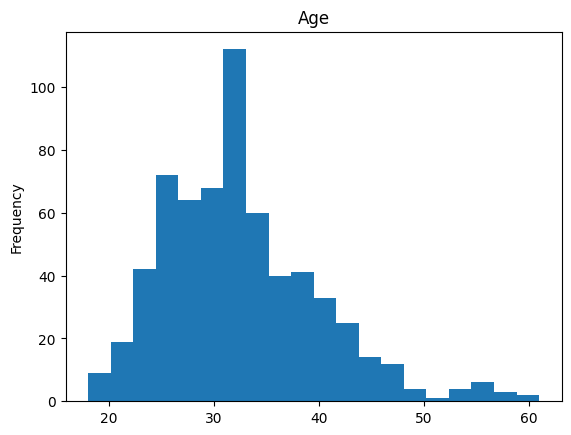

In [68]:
#Emploees have sought treatment for a mental health condition
treat = rel_data[rel_data['treatment']=='Yes']

age_treat = treat.loc[:, ['treatment', 'Age category']].groupby('Age category').count()
plt1 = treat['Age'].plot(kind='hist', bins=20, title='Age')
age_treat

# Mental health issues vary by gender

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

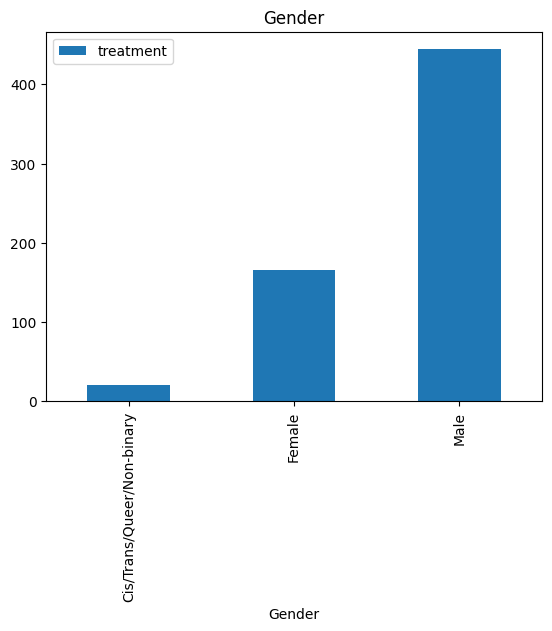

In [70]:
# Count mental health treatment for each category
treat = rel_data[rel_data['treatment']=='Yes']
gender_treat = treat.loc[:, ['treatment', 'Gender']].groupby('Gender').count()
gender_treat.plot(kind='bar', title='Gender')

#The countries with the highest and lowest reported rates of mental health issues in the tech industry.


,treatment
Country,
Australia,13
Belgium,1
Brazil,2
Bulgaria,2
Canada,37
Croatia,2
Denmark,2
Finland,1
France,2


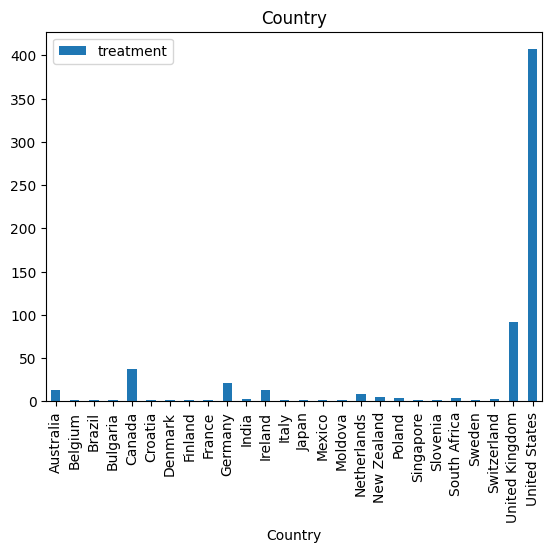

In [71]:
# Count mental health treatment for each category
treat = rel_data[rel_data['treatment']=='Yes']
country_treat = treat.loc[:, ['treatment', 'Country']].groupby('Country').count()
country_treat.plot(kind='bar', title='Country')
display(country_treat)